**2.** Build a Perceptron [multilayer or single layer as the case may be] to recognize a certain area of the plane. That is, the Perceptron should output a “1” if the input vector lies in the shaded region.

    a. Determine the vector of coefficients W for a single layer perceptron of the form in Figure 1 to recognize the area in Figure 2 and again for Figure 3 shaded blue. Use a step-function as the non-linear “sigmoid” activation function at designated nodes.
    
> Figure 2:
    
>> In Figure 2, all points $(x_1,x_2)$ such that $x_1 < 1$ are shaded and therefore in Class 1, all other points are in Class 2. The weight vector $w$ must be perpendicular to the discriminant line and point towards Class 1, so we know $w$ points in the $(-1,0)$ direction. $w$ also must have a bias term, so $w$ has the form $w = (w_0, -1, 0)$. We will also append a $1$ to each input point so $x$ has the form $x = (1, x_1, x_2)$.

>> The activation function is a step function, so, if $x \cdot w < 0$, $x$ will be assigned to Class 0; likewise, if $x \cdot w > 0$, $x$ will be assigned to Class 1. Therefore we must choose the bias term $w_0$ such that $x \cdot w = 0$ at the discriminant boundary $x_1=1$.

\begin{align}
x \cdot w =& 0\\
(1, 1,x_2)\cdot (w_0,-1,0)=&0\\
w_0-1=&0\\
w_0=&1
\end{align}

>> Therefore $w = (1, -1, 0)$ is the final weight vector for the classes in Figure 2.

> Figure 3:

>> In Figure 3, all points $(x_1,x_2)$ such that $x_2 > x_1 - 1$ are shaded and therefore in Class 1, all other points are in Class 2. The weight vector $w$ must be perpendicular to the discriminant line and point towards Class 1, so we know $w$ points in the $(-1,-1)$ direction. $w$ also must have a bias term, so $w$ has the form $w = (w_0, -1, 1)$. We will also append a $1$ to each input point so $x$ has the form $x = (1, x_1, x_2)$.

>> The activation function is a step function, so, if $x \cdot w < 0$, $x$ will be assigned to Class 0; likewise, if $x \cdot w > 0$, $x$ will be assigned to Class 1. Therefore we must choose the bias term $w_0$ such that $x \cdot w = 0$ at the discriminant boundary $x_2=x_1 - 1$. I'll use the point $(x_1,x_2)=(1,0) \implies x=(1,1,0)$ to solve for the bias term.

\begin{align}
x \cdot w =& 0\\
(1, 1,0)\cdot (w_0,-1,1)=&0\\
w_0-1=&0\\
w_0=&1
\end{align}

>> Therefore $w = (1, -1, 1)$ is the final weight vector for the classes in Figure 3.

    b. Determine coefficients W and V in the 2-layer Perceptron of the form in Figure 4 to recognize the shaded region in Figure 5. 
    HINT: The shaded region in Figure 5 equals the intersection of the regions of Figures 2 & 3.
    
> Because Class 1 in Figure 5 is simply the intersection of Class 1 from Figures 2 & 3, we are essentially implementing the "and" function and can therefore re-use the weight vectors we calculated in part a (called $w_1$ and $w_2$).

$$
W=
\begin{bmatrix}
w_1\\
w_2
\end{bmatrix}
=
\begin{bmatrix}
1 & -1 & 0\\
1 & -1 & 1
\end{bmatrix}
$$

> Each point $x$ is multiplied by the weight vectors/matrix and then evaluated by the step funciton to produce the values of the hidden nodes, $z_1$ and $z_2$. These $z$ values will either be 0 or 1. $z_1$ will be 1 if the point $x$ is in Class 1 of Figure 2; $z_2$ will be 1 if the point $x$ is in Class 1 of Figure 3. Therefore points in Class 1 of Figure 5 (which is the intersection of Figures 2 & 3) will have both $z_1=1$ and $z_2=1$. We must choose $V$ such that $(1,1)$ is assigned to Class 1, but all other possible $z$ points ($(1,0)$, $(0,0)$, and $(0,1)$) are not.

>Because the hidden layer weights vector $V$ has a biased term, the variables have the form $z = (1, z_1, z_2)$ and $V = (V_0, V_1, V_2)$. Therefore we must choose the weight vector $V$ such that $z \cdot V = 1$ at $(1,1)$ and $0$ at all other possible points. Technically any vector pointing into the first quadrant would work, but I will chose $(1,1)$ to be the direction of $V$ (without the bias term yet). Now I must choose the bias $V_0$ such that:

\begin{align}
(1,1,1)\cdot (V_0,1,1) > 0 &\implies V_0 + 2 > 0\\
(1,0,1)\cdot (V_0,1,1) < 0 &\implies V_0 + 1 < 0\\
(1,1,0)\cdot (V_0,1,1) < 0 &\implies V_0 + 1 < 0\\
(1,0,0)\cdot (V_0,1,1) < 0 &\implies V_0 < 0\\
\end{align}

> These conditions are satisfied by any $V_0$ between $-2$ and $-1$, but I will choose $V_0=-1.5$. Therefore the final weight vectors for Figure 5 are:

$$
W=
\begin{bmatrix}
1 & -1 & 0\\
1 & -1 & 1
\end{bmatrix}\\
V=
\begin{bmatrix}
-1.5 & 1 & 1
\end{bmatrix}
$$

    Here are some visualizations of my results:

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def step(x): return np.round((np.sign(x)+1)/2.)

w1 = np.array([1,-1,0])
w2 = np.array([1,-1,1])
v = np.array([-1.5,1,1])

n = 1000
X = np.empty([n,3])
Z = np.empty([n,3])
for i in range(n): 
    X[i] = np.array([1, np.random.random()*10-2, np.random.random()*8-4])
    Z[i] = [1, step(X[i].dot(w1)), step(X[i].dot(w2))]

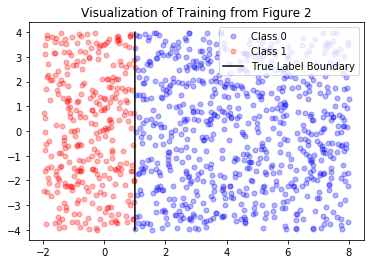

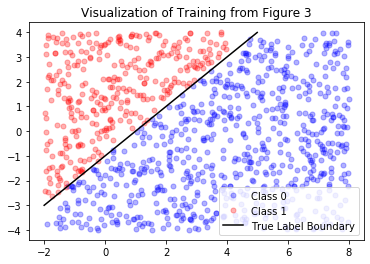

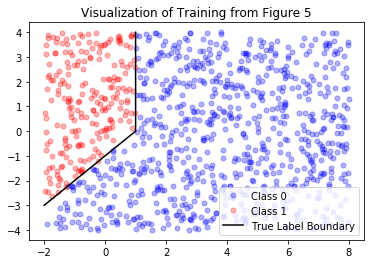

In [46]:
plt.plot(X[step(X.dot(w1))==0][:,1], X[step(X.dot(w1))==0][:,2], 'o', markersize=5, color="blue", alpha=.3, label="Class 0")
plt.plot(X[step(X.dot(w1))==1][:,1], X[step(X.dot(w1))==1][:,2], 'o', markersize=5, color="red", alpha=.3, label="Class 1")
plt.plot(np.ones(10000), np.arange(-4,4,8/10000.), color="black", label="True Label Boundary")
plt.title("Visualization of Training from Figure 2")
plt.legend()
plt.show()

plt.plot(X[step(X.dot(w2))==0][:,1], X[step(X.dot(w2))==0][:,2], 'o', markersize=5, color="blue", alpha=.3, label="Class 0")
plt.plot(X[step(X.dot(w2))==1][:,1], X[step(X.dot(w2))==1][:,2], 'o', markersize=5, color="red", alpha=.3, label="Class 1")
plt.plot(np.arange(-2,5,.01), np.arange(-2,5,.01)-1, color="black", label="True Label Boundary")
plt.title("Visualization of Training from Figure 3")
plt.legend()
plt.show()

plt.plot(X[step(Z.dot(v))==0][:,1], X[step(Z.dot(v))==0][:,2], 'o', markersize=5, color="blue", alpha=.3, label="Class 0")
plt.plot(X[step(Z.dot(v))==1][:,1], X[step(Z.dot(v))==1][:,2], 'o', markersize=5, color="red", alpha=.3, label="Class 1")
plt.plot(np.arange(-2,1,.01), np.arange(-2,1,.01)-1, color="black", label="True Label Boundary")
plt.plot(np.ones(10000), np.arange(0,4,4/10000.), color="black")
plt.title("Visualization of Training from Figure 5")
plt.legend()
plt.show()